In [21]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [90]:
testipt = [
"###############",
"#.......#....E#",
"#.#.###.#.###.#",
"#.....#.#...#.#",
"#.###.#####.#.#",
"#.#.#.......#.#",
"#.#.#####.###.#",
"#...........#.#",
"###.#.#####.#.#",
"#...#.....#.#.#",
"#.#.#.###.#.#.#",
"#.....#...#.#.#",
"#.###.#.#.#.#.#",
"#S..#.....#...#",
"###############",
]

testipt2 = [
"#################",
"#...#...#...#..E#",
"#.#.#.#.#.#.#.#.#",
"#.#.#.#...#...#.#",
"#.#.#.#.###.#.#.#",
"#...#.#.#.....#.#",
"#.#.#.#.#.#####.#",
"#.#...#.#.#.....#",
"#.#.#####.#.###.#",
"#.#.#.......#...#",
"#.#.###.#####.###",
"#.#.#...#.....#.#",
"#.#.#.#####.###.#",
"#.#.#.........#.#",
"#.#.#.#########.#",
"#S#.............#",
"#################",
]

In [9]:
def convert(ipt):
    out = []
    for l in ipt:
        out.append([c for c in l])
    return np.array(out)

In [19]:
def vizualizemap(m):
    mcopy = np.zeros(m.shape)
    #np.where()
    mcopy[m=="."]=500
    mcopy[m=="#"]=-1000
    mcopy[m=="E"]=1500
    mcopy[m=="S"]=1000
    plt.pcolor(mcopy, cmap='magma')
    plt.show()

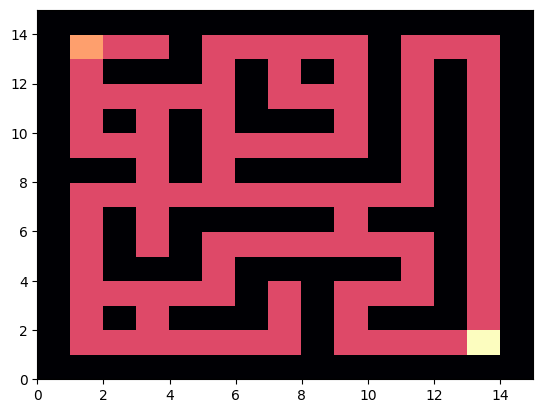

In [20]:
vizualizemap(convert(testipt))

In [14]:
def findStartEnd(ipt):
    s = np.where(ipt=="S")
    e = np.where(ipt=="E")
    return [int(s[0]), int(s[1])], [int(e[0]), int(e[1])]

In [15]:
findStartEnd(convert(testipt))

/var/folders/37/dtwbc3bn3v71fstqsyxzdx040000gn/T/ipykernel_54619/1291798736.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return [int(s[0]), int(s[1])], [int(e[0]), int(e[1])]


([13, 1], [1, 13])

In [128]:
def strigify(pos):
    return "x_"+str(pos[1])+"y_"+str(pos[0])
class path:
    def __init__(self, startpos):
        self.visited = startpos
        self.score = 0
        self.lastvisited = startpos
        self.locations = ["x_"+str(startpos[1])+"y_"+str(startpos[0])]
        self.face = "E"
    def addLocation(self, newface):
        pos = self.lastvisited
        if newface == "E": pos[1]+=1
        elif newface == "S": pos[0]+=1
        if newface == "W": pos[1]-=1
        elif newface == "N": pos[0]-=1
        templ = strigify(pos)
        if templ in self.locations: return False
        else:
            self.locations.append(templ)
            if self.face == newface: self.score+=1
            else: self.score += 1001
            self.lastvisited=pos
            self.face = newface
        return True
    def cpos(self):
        return self.lastvisited,self.face 
        
def expandpaths(p,m,e, paths, explored, maxscore=None):
    cpos, face = p.cpos()
    # maxscore, i.e we ran for part one, we know the shortest paths score
    # skip all paths longer/more expensive as we dont need them
    if maxscore and p.score>maxscore: return
    if len(paths)>0:
        # if we already found a path reaching the end, skip paths that
        # are longer /  more expensive then the best one found yet
        if p.score > paths[0].score: return
    if strigify(cpos) in explored.keys():
        # if path to given position longer/more expensice than others-> skip
        # add 1001 to allow reaching this position while facing differenctly,
        # as thismight be equivalent as the "better" path still has to turn
        if p.score > (explored[strigify(cpos)]+1001): return
        elif p.score< explored[strigify(cpos)]: explored[strigify(cpos)] = p.score
    else: explored[strigify(cpos)] = p.score
    if cpos == e:
        # found path reaching the end, sort to skip worse parts earlier
        paths.append(p)
        paths.sort(key=lambda p1: p1.score)
    out = []
    ds = face
    dl, dr = "", ""
    if face == "E": dl, dr = "N", "S"
    elif face == "N": dl, dr = "W", "E"
    elif face == "W": dl, dr = "S", "N"
    elif face == "S": dl, dr = "E", "W"
    straight = copy.deepcopy(p)
    left = copy.deepcopy(p)
    right = copy.deepcopy(p)
    if straight.addLocation(ds):
        if m[straight.cpos()[0][0],straight.cpos()[0][1]] != "#":
            expandpaths(straight,m,e, paths, explored)
    if left.addLocation(dl):
        if m[left.cpos()[0][0],left.cpos()[0][1]] != "#":
            expandpaths(left,m,e, paths, explored)
    if right.addLocation(dr):
        if m[right.cpos()[0][0],right.cpos()[0][1]] != "#":
            expandpaths(right,m,e, paths, explored)
    
def findBestPath(m, maxscore=None):
    paths = []
    s,e = findStartEnd(m)
    explored={strigify(s):0}
    p = path(s)
    expandpaths(p, m,e, paths, explored, maxscore)
    print(paths[0].score)
    besttiles = set()
    for p in paths:
        if p.score == paths[0].score:
            # a best path
            for l in p.locations:
                besttiles.add(l)
    print(len(besttiles))
    vizualizePath(m, paths[0])
    vizualizePaths(m, paths)
    

In [110]:
s, e =findStartEnd(convert(testipt))

/var/folders/37/dtwbc3bn3v71fstqsyxzdx040000gn/T/ipykernel_54619/1291798736.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return [int(s[0]), int(s[1])], [int(e[0]), int(e[1])]


7036
45


/var/folders/37/dtwbc3bn3v71fstqsyxzdx040000gn/T/ipykernel_54619/1291798736.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return [int(s[0]), int(s[1])], [int(e[0]), int(e[1])]


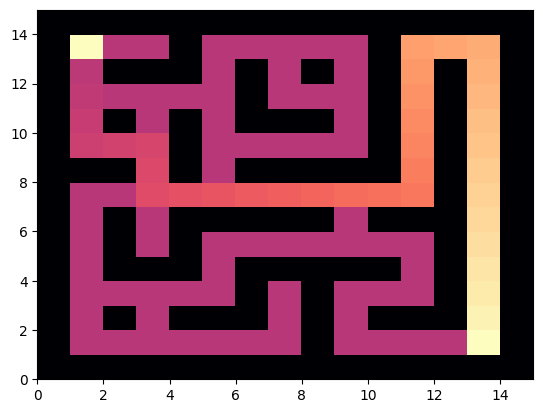

In [115]:
findBestPath(convert(testipt))

11048
64


/var/folders/37/dtwbc3bn3v71fstqsyxzdx040000gn/T/ipykernel_54619/1291798736.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return [int(s[0]), int(s[1])], [int(e[0]), int(e[1])]


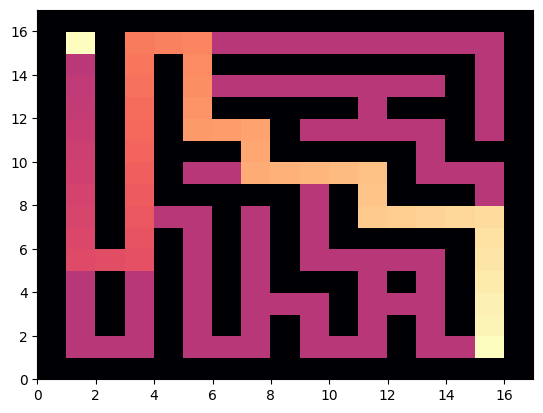

In [116]:
findBestPath(convert(testipt2))

In [80]:
def vizualizePath(m, p):
    mcopy = np.zeros(m.shape)
    #np.where()
    mcopy[m=="."]=500
    mcopy[m=="#"]=-1000
    for ipos, pos in enumerate(p.locations):
        npos = pos.replace("x_","").replace("y_",",").split(",")
        x,y = int(npos[0]), int(npos[1])
        mcopy[y][x]=500 + ipos*1500./len(p.locations)
    mcopy[m=="E"]=2000
    mcopy[m=="S"]=2000
    plt.pcolor(mcopy, cmap='magma')
    plt.show()


In [117]:
ipt = [l.strip("\n") for l in open("input.txt")]

/var/folders/37/dtwbc3bn3v71fstqsyxzdx040000gn/T/ipykernel_54619/1291798736.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return [int(s[0]), int(s[1])], [int(e[0]), int(e[1])]


90460
575


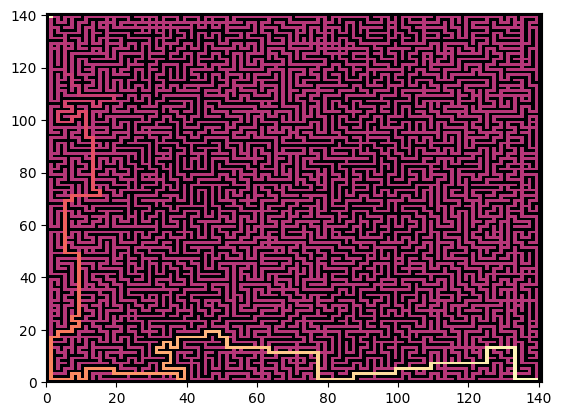

In [122]:
findBestPath(convert(ipt), 90460)

In [125]:
def vizualizePaths(m, paths):
    mcopy = np.zeros(m.shape)
    #np.where()
    mcopy[m=="."]=100
    mcopy[m=="#"]=-1000
    for p in paths:
        for ipos, pos in enumerate(p.locations):
            npos = pos.replace("x_","").replace("y_",",").split(",")
            x,y = int(npos[0]), int(npos[1])
            mcopy[y][x]=500 + ipos*1500./len(p.locations)
    mcopy[m=="E"]=2000
    mcopy[m=="S"]=2000
    plt.pcolor(mcopy, cmap='magma')
    plt.show()

/var/folders/37/dtwbc3bn3v71fstqsyxzdx040000gn/T/ipykernel_54619/1291798736.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return [int(s[0]), int(s[1])], [int(e[0]), int(e[1])]


90460
575


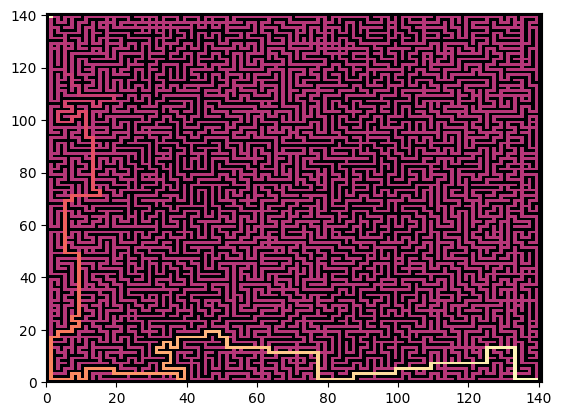

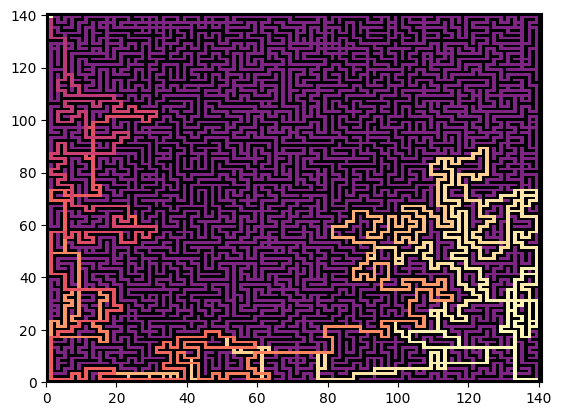

In [127]:
findBestPath(convert(ipt), 90460)